## Import modules

In [1]:
from sklearn import datasets        #pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     #pip install matplotlib

## Set up our plot style

In [2]:
# Set plot style
plt.style.use('ggplot')

## Load dataset

In [7]:
iris = datasets.load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


iris的type為'sklearn.utils.Bunch'，是一種類似dictionary的資料結構，也是key:value

In [8]:
# Print all keys in iris
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


有'data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'這些keys <br/>
其中，DESCR代表description of the dataset、data為真的dataset、target代表target variable、feature_names為column names

In [9]:
print("Type of data: "+str(type(iris["data"])), "Type of target variable: "+str(type(iris["target"])))

Type of data: <class 'numpy.ndarray'> Type of target variable: <class 'numpy.ndarray'>


由上可發現data和target都是numpy array

In [10]:
print("Dimension of data: "+str(iris.data.shape))

Dimension of data: (150, 4)


取得number of rows and columns <br/>
Target variable中，"setosa"被labelled = 0, "versicolor"被labelled = 1, "virginica"被labelled = 2"

## Convert into dataframe

In [13]:
# Building a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(df.head())
print(df.describe())
# print(df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

---

# K-nearest neighbor classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# initialize a model and specify a number of k
knn = KNeighborsClassifier(n_neighbors = 6)

Training our model

In [16]:
knn.fit(iris["data"], iris["target"])

KNeighborsClassifier(n_neighbors=6)

Testing data

In [17]:
X_new = np.array([[5.6,2.8,3.9,1.1],[5.7,2.6,3.8,1.3],[4.7,3.2,1.3,0.2]])

Make prediction

In [25]:
prediction = knn.predict(X_new)
prediction
temp = []
for i in prediction:
    if i == 0:
        temp.append("setosa")
    elif i == 1:
        temp.append("versicolor")
    elif i == 2:
        temp.append("virginica")
temp

['versicolor', 'versicolor', 'setosa']

---

# Data partitioning

In [26]:
from sklearn.model_selection import train_test_split
X = iris["data"]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify = y)

Training and assessing the model

In [28]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
# Predicting
y_pred = knn.predict(X_test)
temp = []
for i in y_pred:
    if i == 0:
        temp.append("setosa")
    elif i == 1:
        temp.append("versicolor")
    elif i == 2:
        temp.append("virginica")
temp

['virginica',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor']

Accuracy

In [29]:
# Accuracy
## Method 1
print("Prediction Accuracy (Method 1): "+str(len(y_pred[y_pred==y_test])/len(y_pred)))
## Method 2
print("Prediction Accuracy (Method 2): "+str(knn.score(X_test, y_test)))

Prediction Accuracy (Method 1): 0.9555555555555556
Prediction Accuracy (Method 2): 0.9555555555555556


---

Overfitting and underfitting

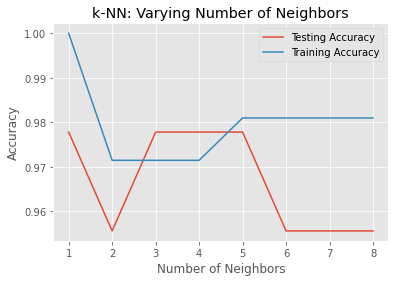

In [30]:
# 檢查overfit或underfit
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()